In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sidetable as stb
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

plt.rcParams["figure.figsize"] = (20,15)

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Pair Programming Intro Machine Learning

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [2]:
df = pd.read_csv("../archivos/cost-of-living_v2.csv")
df.shape

(4956, 58)

In [3]:
df.stb.missing().T

,x40,x53,x52,x29,x43,x51,x28,x50,x54,x49,x32,x39,x48,x37,x42,x34,x31,x55,x35,x30,x25,x26,x45,x33,x15,x14,x47,x12,x46,x22,x4,x27,x36,x44,x13,x41,x19,x24,x2,x7,x18,x5,x20,x21,x1,x10,x23,x17,x9,x16,x38,x6,x11,x3,x8,city,country,data_quality
missing,2400.00000,2303.000000,2227.000000,2166.0000,1681.000000,1512.000000,1506.000000,1480.000000,1432.00000,1431.000000,1396.000000,1375.000000,1363.000000,1201.000000,1132.000000,1058.000000,1022.000000,1006.000000,995.000000,873.000000,721.000000,655.000000,617.000000,588.000000,566.0000,558.00000,553.000000,507.000000,503.000000,501.000000,496.000000,490.000000,488.000000,479.000000,478.000000,475.000000,469.000000,462.000000,451.000000,445.000000,441.000000,440.000000,437.000000,433.000000,428.000000,413.000000,388.000000,381.000000,378.000000,372.000000,349.000000,344.000000,343.000000,334.000000,316.00000,0.0,0.0,0.0
total,4956.00000,4956.000000,4956.000000,4956.0000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.0000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.0,4956.0,4956.0
percent,48.42615,46.468927,44.935432,43.7046,33.918483,30.508475,30.387409,29.862793,28.89427,28.874092,28.167877,27.744149,27.502018,24.233253,22.841001,21.347861,20.621469,20.298628,20.076675,17.615012,14.548023,13.216303,12.449556,11.864407,11.4205,11.25908,11.158192,10.230024,10.149314,10.108959,10.008071,9.887006,9.846651,9.665052,9.644875,9.584342,9.463277,9.322034,9.100081,8.979015,8.898305,8.878128,8.817595,8.736885,8.635997,8.333333,7.828894,7.687651,7.627119,7.506053,7.041969,6.941082,6.920904,6.739306,6.37611,0.0,0.0,0.0


In [4]:
df.sample(5)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
4808,Aigle,Switzerland,37.40,85.48,19.23,8.55,7.48,4.81,4.27,3.74,1.71,3.21,4.27,7.69,21.37,26.71,64.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.37,NaN,NaN,NaN,3.74,NaN,NaN,NaN,NaN,1.82,NaN,NaN,NaN,NaN,85.48,NaN,NaN,NaN,1282.14,NaN,NaN,NaN,106.85,NaN,747.92,747.92,1923.21,NaN,27107.76,NaN,NaN,NaN,0
4590,Ceglie Messapico,Italy,13.70,63.22,8.74,4.11,4.21,1.05,1.58,1.37,0.84,1.05,1.90,1.78,11.59,8.43,12.54,1.05,1.32,1.05,1.84,0.84,0.84,0.53,0.21,3.16,3.16,NaN,5.69,1.05,NaN,2.63,1.05,18.97,2.11,24776.18,28767.24,185.15,0.28,35.83,47.42,NaN,7.38,295.05,NaN,53.39,35.12,72.01,98.35,NaN,NaN,NaN,NaN,NaN,NaN,1053.75,1.36,0
4881,Nasice,Croatia,5.58,30.71,3.49,1.95,1.81,0.98,1.95,1.40,0.91,0.91,0.98,2.01,8.38,4.19,15.36,1.26,1.26,1.81,1.40,0.84,0.84,0.70,0.70,4.89,1.12,1.12,4.47,NaN,NaN,1.40,0.56,8.38,1.33,13959.85,20939.78,59.33,0.05,20.80,NaN,13.96,2.79,69.80,NaN,41.88,27.92,55.84,55.84,NaN,NaN,NaN,NaN,1814.78,977.19,NaN,5.50,0
1469,Kiel,Germany,11.38,52.69,8.42,4.11,3.16,3.40,2.19,2.99,1.01,1.92,2.14,2.41,11.23,6.65,13.34,2.10,1.70,2.45,1.26,1.18,0.98,1.09,0.48,5.27,0.58,1.23,8.43,2.74,64.28,3.64,2.05,25.29,2.30,25816.76,29504.87,224.80,0.10,32.66,29.85,21.07,12.64,304.53,11591.2,79.03,38.64,99.84,133.47,807.87,488.94,1593.79,1072.71,3688.11,2634.36,2476.30,2.23,1
3521,Lelydorp,Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
def exploracion(dataframe):
    '''
    Función que nos permite explorar varios aspectos de un dataframe mostrando
    unas filas, el numero de filas y columnas, los tipos de datos, la cantidad de nulos por columna,
    la cantidad de filas duplicadas, y los principales estadísticos.
        Parametros:
                dataframe (dataframe): un dataframe que queremos explorar
                nombre (string): un titulo para el dataframe
    '''
    print(".............................................")
    print(f"En el dataframe hay {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas.")
    print(".............................................")    
    print(f"5 filas aleatorias:")
    display(dataframe.sample(5))
    print(".............................................")
    print(f"Los tipos de data por columna del dataframe son:")
    display(dataframe.dtypes.reset_index())
    print(".............................................")
    print(f"La cantidad de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum().reset_index())
    print(".............................................")
    print(f"El porcentaje de nulos por columna del dataframe son:")
    display(dataframe.isnull().sum() * 100 / dataframe.shape[0])
    print(".............................................")
    if dataframe.duplicated().sum() != 0:
        print(f"En el dataframe hay {dataframe.duplicated().sum()} filas duplicadas.")
    else:
        print(f"No hay filas duplicadas.")
    print(".............................................")
    print(f"Los principales estadísticos de las columnas numéricas son:")
    display(dataframe.describe())
    print(".............................................")
    print(f"Los principales estadísticos de las columnas categóricas son:")
    display(dataframe.describe(include=object))
    print(".............................................")

In [6]:
eda = exploracion(df)

.............................................
En el dataframe hay 4956 filas y 58 columnas.
.............................................
5 filas aleatorias:


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
4681,Ivdel,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3242,Orhei,Moldova,1.54,NaN,2.82,0.77,0.92,0.82,0.58,0.41,0.77,0.36,0.87,1.27,7.95,4.30,5.47,0.63,1.37,1.47,1.40,0.41,0.38,0.71,0.48,1.54,0.65,0.75,2.31,NaN,NaN,0.77,0.13,1.03,1.12,15416.19,16044.54,60.95,0.08,8.89,NaN,NaN,3.59,164.05,3598.79,51.26,30.76,78.95,76.9,NaN,NaN,NaN,NaN,NaN,NaN,205.06,5.50,0
3500,Sremska Mitrovica,Serbia,1.80,10.77,3.59,1.80,2.15,1.14,1.25,0.98,0.92,0.51,2.01,1.72,3.14,3.59,6.88,0.75,1.27,1.16,1.30,0.58,0.49,0.42,0.45,2.69,0.51,0.87,3.14,0.72,NaN,0.85,0.54,4.49,1.48,18402.60,20460.79,202.56,0.03,13.91,22.44,6.28,4.49,53.86,NaN,50.27,17.95,35.91,37.4,164.92,100.93,237.36,151.39,1175.25,984.55,471.29,4.83,0
2128,Medea,Algeria,1.99,13.54,2.71,1.59,1.77,0.22,0.34,0.16,0.45,0.18,0.87,1.36,NaN,7.23,13.02,0.87,2.17,0.58,0.29,0.36,0.11,NaN,0.22,7.23,1.08,1.45,2.17,0.14,NaN,NaN,NaN,3.62,0.33,36165.08,14466.03,32.55,0.07,36.17,NaN,NaN,3.62,NaN,NaN,NaN,NaN,NaN,NaN,144.66,86.80,NaN,122.96,867.96,361.65,NaN,NaN,0
1107,Pokhara,Nepal,1.92,15.38,4.81,1.54,2.88,1.05,0.42,0.17,0.78,0.71,0.58,1.29,7.50,2.90,3.69,2.40,0.85,0.85,0.52,0.56,0.42,0.19,0.26,6.15,1.54,1.54,1.31,0.15,0.0,0.77,0.58,3.84,0.87,36713.75,39981.46,17.68,0.02,21.72,46.13,8.46,2.50,15.38,1153.31,13.46,14.10,48.70,34.6,115.33,76.89,307.55,138.40,3459.93,2306.62,205.03,8.33,0


.............................................
Los tipos de data por columna del dataframe son:


,index,0
0,city,object
1,country,object
2,x1,float64
3,x2,float64
4,x3,float64
5,x4,float64
6,x5,float64
7,x6,float64
8,x7,float64
9,x8,float64


.............................................
La cantidad de nulos por columna del dataframe son:


,index,0
0,city,0
1,country,0
2,x1,428
3,x2,451
4,x3,334
5,x4,496
6,x5,440
7,x6,344
8,x7,445
9,x8,316


.............................................
El porcentaje de nulos por columna del dataframe son:


city             0.000000
country          0.000000
x1               8.635997
x2               9.100081
x3               6.739306
x4              10.008071
x5               8.878128
x6               6.941082
x7               8.979015
x8               6.376110
x9               7.627119
x10              8.333333
x11              6.920904
x12             10.230024
x13              9.644875
x14             11.259080
x15             11.420500
x16              7.506053
x17              7.687651
x18              8.898305
x19              9.463277
x20              8.817595
x21              8.736885
x22             10.108959
x23              7.828894
x24              9.322034
x25             14.548023
x26             13.216303
x27              9.887006
x28             30.387409
x29             43.704600
x30             17.615012
x31             20.621469
x32             28.167877
x33             11.864407
x34             21.347861
x35             20.076675
x36              9.846651
x37         

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,4613.00000,4449.000000,4478.000000,4398.000000,4390.000000,4584.000000,4575.000000,4515.000000,4487.000000,4519.000000,4523.000000,4455.000000,4568.000000,4494.000000,4235.000000,4301.000000,4466.000000,3450.000000,2790.000000,4083.000000,3934.000000,3560.000000,4368.000000,3898.000000,3961.000000,4468.000000,3755.000000,4607.000000,3581.000000,2556.000000,4481.000000,3824.000000,3275.000000,4477.000000,4339.000000,4453.000000,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,1.148554,1.612855,2.18726,2.352544,9.498341,7.169729,11.722251,2.749391,1.554691,2.361697,2.559650,1.566477,1.522472,1.227113,0.986806,8.642628,1.658430,2.310500,6.285253,1.517145,43.981717,2.765378,1.231490,17.175180,1.361664,23781.480667,23878.492083,136.254584,0.136008,146.323369,36.849994,15.780137,8.366133,489.580267,8770.865915,52.617391,35.039650,76.998309,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,0.517186,1.089164,1.63280,1.078669,4.930385,4.450099,7.284523,1.877756,0.831027,1.697792,1.810338,1.227042,1.123391,0.733580,0.678959,4.646069,0.912728,1.196492,4.446120,1.327994,36.867305,2.230275,0.853241,15.666538,0.495643,9057.962571,8770.285094,85.048918,0.123784,7159.592660,22.929434,11.157743,4.132562,515.000774,8030.169251,25.267695,15.173614,33.252260,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,0.25000,0.100000,0.900000,1.220000,1.470000,0.270000,0.220000,0.200000,0.120000,0.110000,0.110000,0.080000,0.110000,0.360000,0.250000,0.360000,0.450000,0.000000,0.000000,0.140000,0.090000,0.160000,0.030000,0.000000,3212.850000,6.070000,0.000000,1.360000,0.000000,0.000000,0.680000,4.070000,0.000000,4.070000,0.000000,8.030000,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,0.830000,0.780000,1.05000,1.570000,6.150000,4.012500,7.240000,1.460000,1.100000,1.210000,1.190000,0.740000,0.740000,0.710000,0.490000,5.270000,0.990000,1.490000,3.050000,0.480000,18.030000,1.080000,0.530000,4.790000,1.080000,18595.955000,19365.840000,68.780000,0.050000,18.830000,22.540000,8.000000,4.810000,136.622500,3161.240000,35.000000,26.340000,61.900000,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,1.045000,1.320000,1.69000,2.140000,8.800000,6.140000,10.250000,2.270000,1.420000,1.890000,2.140000,1.210000,1.170000,1.050000,0.760000,7.805000,1.430000,2.110000,5.270000,1.160000,35.000000,2.500000,1.130000,12.640000,1.280000,22920.730000,22537.500000,128.085000,0.100000,34.440000,33.180000,13.550000,8.190000,302.950000,6324.790000,48.040000,33.130000,75.000000,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,1.320000,2.200000,2.74000,2.970000,11.837500,9.210000,14.310000,3.590000,1.820000,3.060000,3.570000,2.100000,2.110000,1.630000,1.390000,11.440000,2.140000,2.870000,8.430000,2.207500,60.517500,3.690000,1.710000,25.577500,1.710000,26821.052500,26944.410000,185.000000,0.190000,57.950000,45.000000,21.070000,

.............................................
Los principales estadísticos de las columnas categóricas son:


,city,country
count,4956,4956
unique,4898,215
top,Victoria,United States
freq,4,1073


.............................................


In [7]:
df.isnull().sum()

city               0
country            0
x1               428
x2               451
x3               334
x4               496
x5               440
x6               344
x7               445
x8               316
x9               378
x10              413
x11              343
x12              507
x13              478
x14              558
x15              566
x16              372
x17              381
x18              441
x19              469
x20              437
x21              433
x22              501
x23              388
x24              462
x25              721
x26              655
x27              490
x28             1506
x29             2166
x30              873
x31             1022
x32             1396
x33              588
x34             1058
x35              995
x36              488
x37             1201
x38              349
x39             1375
x40             2400
x41              475
x42             1132
x43             1681
x44              479
x45              617
x46          

In [8]:
df.dropna(subset= ["x36"], how = "any", inplace = True)

In [9]:
df.isnull().sum()

city               0
country            0
x1               232
x2               247
x3               134
x4               277
x5               220
x6               155
x7               248
x8               137
x9               194
x10              214
x11              151
x12              301
x13              225
x14              332
x15              319
x16              157
x17              172
x18              206
x19              225
x20              202
x21              204
x22              241
x23              165
x24              207
x25              445
x26              355
x27              239
x28             1162
x29             1754
x30              526
x31              664
x32              985
x33              298
x34              658
x35              601
x36                0
x37              808
x38               59
x39             1041
x40             1967
x41              202
x42              737
x43             1245
x44              182
x45              285
x46          

In [10]:
numeric = df.select_dtypes(include=np.number)

In [11]:
numeric.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
x1,1.000000,0.793067,0.702972,0.672706,0.616775,0.641937,0.748429,0.706401,0.130772,0.629633,0.542652,0.670373,0.430272,0.673034,0.518970,0.432971,0.359117,0.515097,0.582019,0.509993,0.534871,0.537372,0.577400,0.354889,0.464019,0.315918,0.629087,0.590772,0.524126,0.533469,0.512756,0.661051,0.404401,0.193902,0.150376,0.538796,0.306065,-0.009068,0.365832,0.327693,0.712263,0.644640,0.505923,0.393818,0.251911,0.259979,0.501904,0.625690,0.666458,0.562302,0.634436,0.182856,0.267215,0.715219,-0.379834,0.059248
x2,0.793067,1.000000,0.725427,0.704250,0.647857,0.661170,0.773106,0.750879,0.224596,0.625616,0.509242,0.693964,0.460748,0.665023,0.571047,0.424184,0.383001,0.474685,0.561049,0.478052,0.501694,0.568842,0.562961,0.385529,0.470449,0.312597,0.651505,0.632375,0.565018,0.586219,0.562998,0.703807,0.444638,0.236166,0.170863,0.536971,0.309869,0.008512,0.432064,0.386473,0.755417,0.617030,0.494902,0.451465,0.286285,0.308086,0.552517,0.626246,0.652806,0.594541,0.639911,0.235058,0.334448,0.699462,-0.401643,0.129766
x3,0.702972,0.725427,1.000000,0.655917,0.591547,0.594806,0.747029,0.729957,0.236495,0.586995,0.432757,0.670602,0.468652,0.635208,0.570929,0.388944,0.383320,0.414783,0.472605,0.442990,0.455905,0.520264,0.479774,0.338051,0.403531,0.297300,0.559199,0.541751,0.468001,0.581620,0.578318,0.675928,0.456381,0.231733,0.208578,0.484908,0.299176,0.048766,0.384797,0.376916,0.686141,0.524782,0.387196,0.442963,0.298761,0.302069,0.506040,0.512442,0.531041,0.456783,0.503615,0.240136,0.319607,0.605995,-0.378714,0.080579
x4,0.672706,0.704250,0.655917,1.000000,0.820262,0.672518,0.687942,0.658043,0.166644,0.595252,0.499154,0.630086,0.390576,0.611538,0.514452,0.425193,0.339110,0.465992,0.503315,0.449934,0.479557,0.522810,0.544444,0.476038,0.588439,0.439629,0.642997,0.579321,0.538540,0.515996,0.470654,0.648716,0.401680,0.182547,0.115337,0.474442,0.248001,0.010189,0.331939,0.306111,0.702986,0.577730,0.429358,0.332848,0.195654,0.189772,0.443443,0.592577,0.624692,0.522299,0.583509,0.228064,0.312532,0.687621,-0.418547,0.093615
x5,0.616775,0.647857,0.591547,0.820262,1.000000,0.716973,0.592635,0.563305,0.193113,0.638318,0.547484,0.569038,0.364554,0.578501,0.427615,0.500964,0.309506,0.541119,0.537257,0.513378,0.531569,0.530929,0.608040,0.574647,0.651225,0.535437,0.592432,0.494657,0.466968,0.450026,0.398570,0.549494,0.227960,0.149678,0.076960,0.404926,0.220404,-0.004861,0.317188,0.259827,0.636547,0.559363,0.442948,0.185001,0.197311,0.170124,0.380793,0.614857,0.636848,0.550304,0.610758,0.231791,0.301997,0.672342,-0.324070,0.076916
x6,0.641937,0.661170,0.594806,0.672518,0.716973,1.000000,0.617295,0.623346,0.248719,0.722510,0.620701,0.615507,0.398972,0.619706,0.490718,0.603595,0.345914,0.625939,0.625356,0.588950,0.608363,0.584720,0.691094,0.572614,0.561189,0.426463,0.551435,0.533834,0.493847,0.434561,0.467441,0.558959,0.170986,0.190258,0.090100,0.450255,0.230408,0.016698,0.348160,0.308517,0.716866,0.627925,0.543291,0.189680,0.215819,0.221235,0.424695,0.653177,0.683105,0.600512,0.656102,0.208082,0.275996,0.751458,-0.319266,0.049533
x7,0.748429,0.773106,0.747029,0.687942,0.592635,0.617295,1.000000,0.864659,0.134803,0.615359,0.470417,0.703807,0.471779,0.696826,0.612036,0.373418,0.404229,0.441369,0.524384,0.448731,0.476088,0.505351,0.470986,0.261893,0.375690,0.237312,0.603558,0.619918,0.493267,0.571467,0.580037,0.718280,0.555203,0.213808,0.174829,0.609516,0.324952,0.016931,0.354323,0.338096,0.716848,0.557934,0.437416,0.506058,0.260773,0.281328,0.540672,0.546954,0.585171,0.505149,0.559294,0.215610,0.293662,0.666546,-0.462218,0.073460
x8,0.706401,0.750879,0.729957,0.658043,0.563305,0.623346,0.864659,1.000000,0.118451,0.610187,0.458389,0.669826,0.449626,0.659187,0.609443,0.389827,0.378957,0.436068,0.515605,0.457312,0.467330,0.530149,0.497823,0.27684

In [12]:
mask = np.triu(np.ones_like(numeric.corr(),dtype = np.bool_))

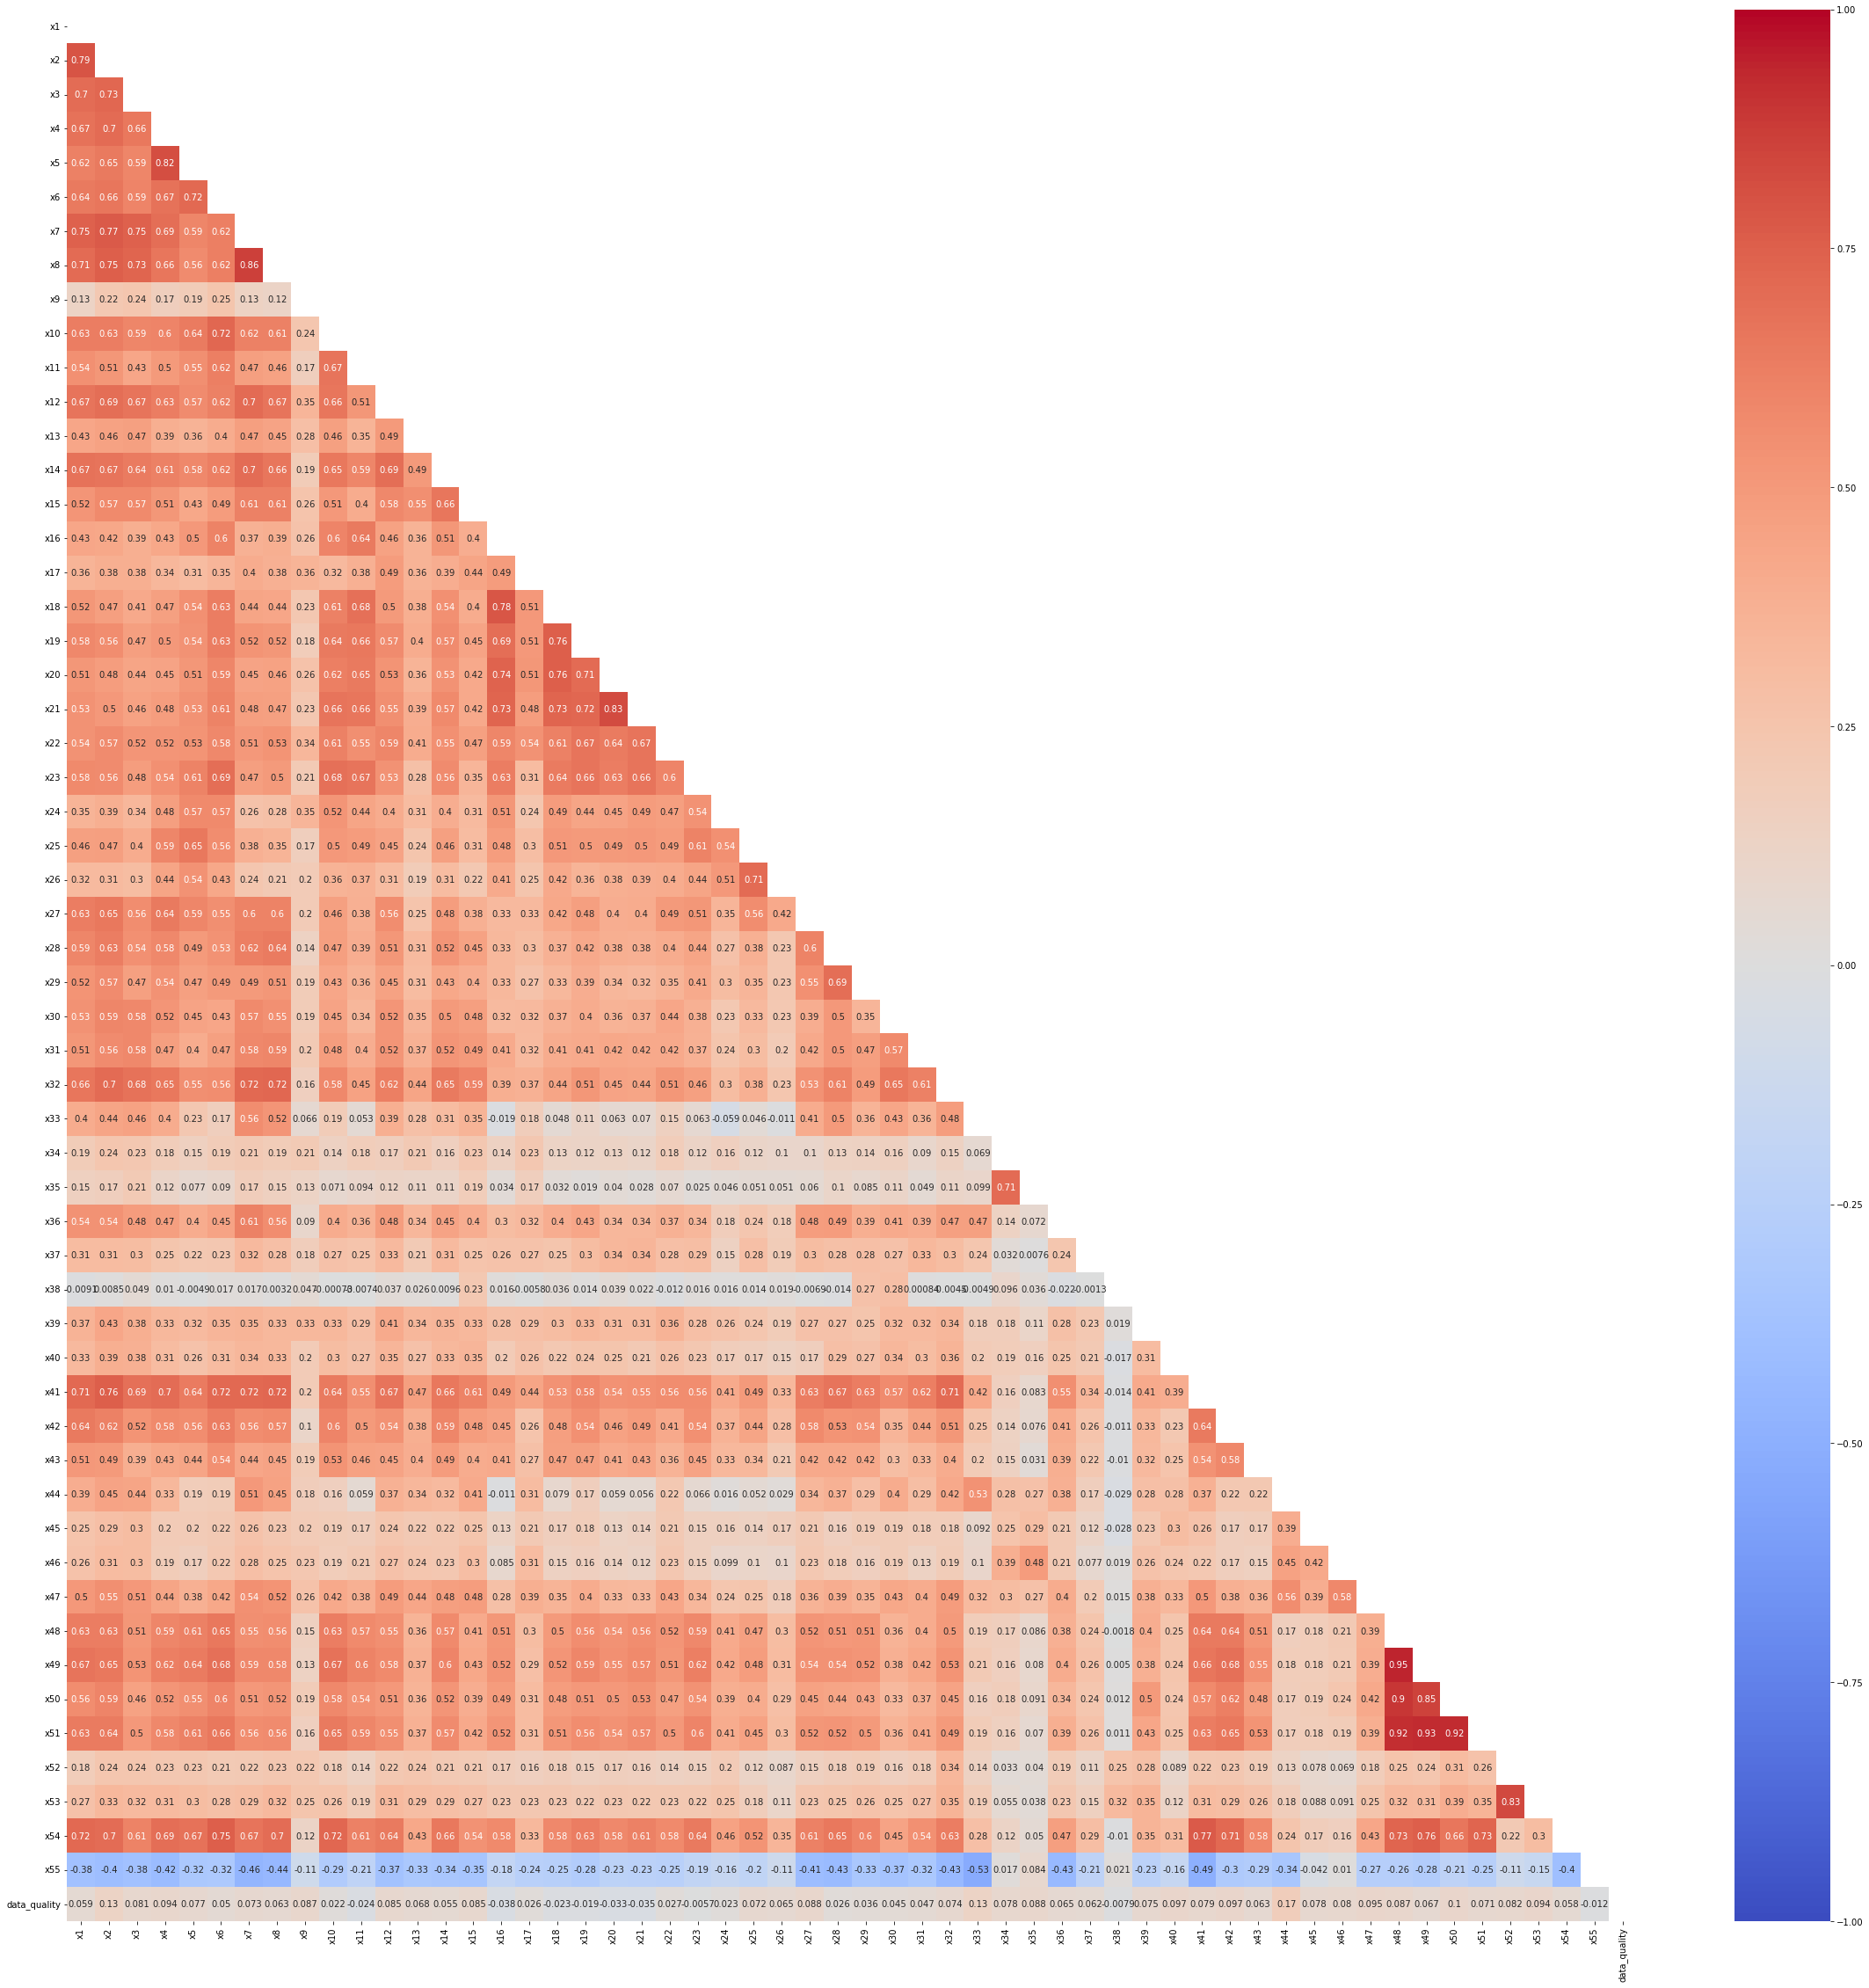

In [13]:
plt.figure(figsize=(40,40))
sns.heatmap(numeric.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1);

In [15]:
columnas_fuera = ['x1', 'x2', 'x4','x5', 'x7', 'x8', 'x10', 'x13', 'x16','x18', 'x19', 'x20', 'x21', 'x22', 'x26', 'x29', 'x30', 'x32', 'x34', 'x35', 'x37','x40', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50','x52', 'x53', 'x55', 'data_quality']

In [16]:
df.drop(columns= columnas_fuera, inplace=True)

In [18]:
dicc_names= {'city':'city',
'country':'country',
'x3':'mcdonalds',
'x6':'cappuccino',
'x9':'milk',
'x11':'rice',
'x12':'eggs',
'x14':'chicken',
'x15':'beef',
'x17':'banana',
'x23':'water',
'x24':'wine',
'x25':'beer',
'x27':'cigarettes_marlboro',
'x28':'public_transport_ticket',
'x31':'taxi',
'x33':'gasoline',
'x36':'basic',
'x38':'internet',
'x39':'gym_monthly',
'x41':'cinema',
'x42':'preschool',
'x43':'primary_school',
'x51':'apt_3beds_outcentre',
'x54':'monthly_salary'}

In [19]:
df.rename(columns = dicc_names, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4468 entries, 0 to 4954
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     4468 non-null   object 
 1   country                  4468 non-null   object 
 2   mcdonalds                4334 non-null   float64
 3   cappuccino               4313 non-null   float64
 4   milk                     4274 non-null   float64
 5   rice                     4317 non-null   float64
 6   eggs                     4167 non-null   float64
 7   chicken                  4136 non-null   float64
 8   beef                     4149 non-null   float64
 9   banana                   4296 non-null   float64
 10  water                    4303 non-null   float64
 11  wine                     4261 non-null   float64
 12  beer                     4023 non-null   float64
 13  cigarettes_marlboro      4229 non-null   float64
 14  public_transport_ticket  3306

In [21]:
df.stb.missing()

,missing,total,percent
primary_school,1245,4468,27.864816
apt_3beds_outcentre,1165,4468,26.074306
public_transport_ticket,1162,4468,26.007162
monthly_salary,1095,4468,24.507610
gym_monthly,1041,4468,23.299015
preschool,737,4468,16.495076
taxi,664,4468,14.861235
beer,445,4468,9.959714
chicken,332,4468,7.430618
beef,319,4468,7.139660


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

- Esto se hace para que comprendais mejor los datos con los que estais trabajando.

- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

Nuestra variable dependiente es x36, (sobre los básicos como la electricidad, el agua en el hogar). Es un float con 9.85 nulos. Tener en cuenta la data_quality, falso integer

In [22]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87


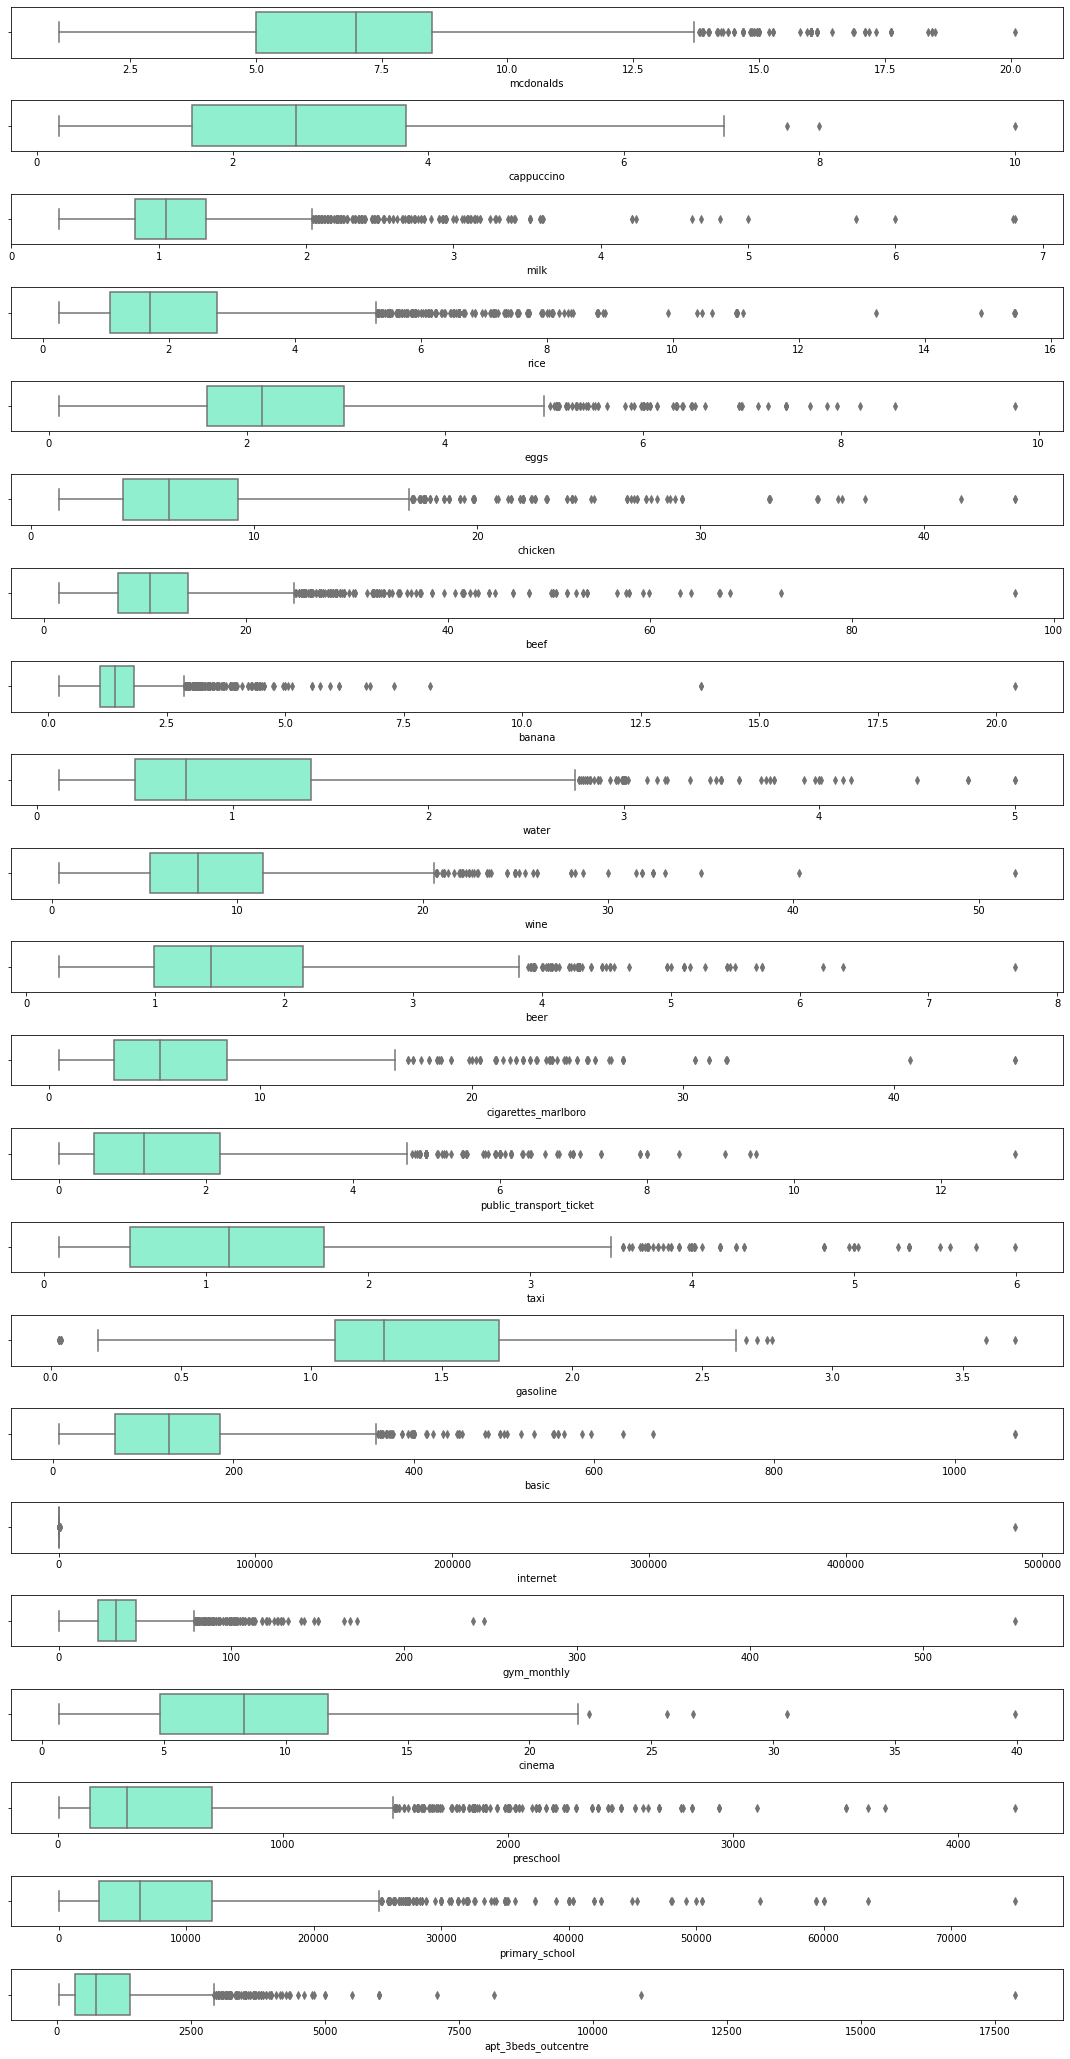

In [48]:
fig, axes = plt.subplots(23, figsize=(15,30))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()

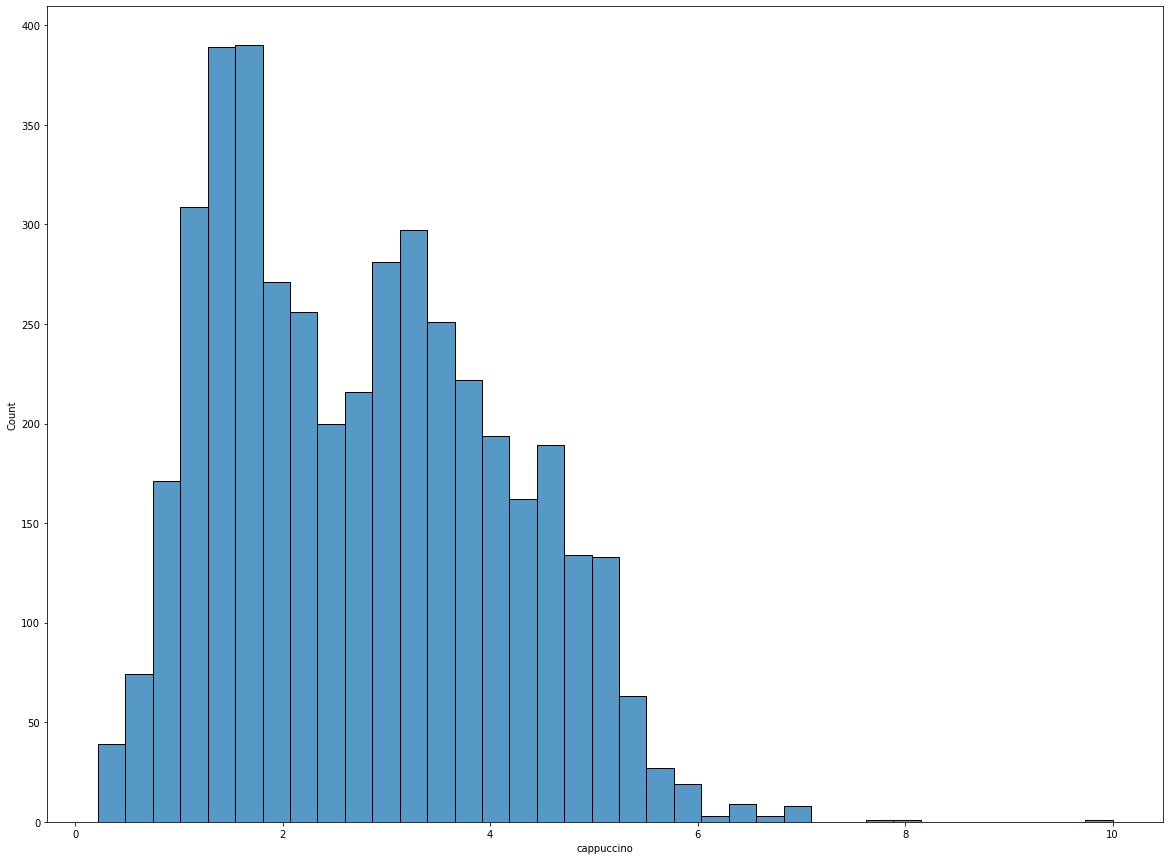

In [ ]:
sns.histplot(numericas['cappuccino']);

In [ ]:
stats.shapiro(numericas['cappuccino'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
# df['required_age'].fillna(df['required_age'].median ,inplace = True)
# numericas['cap_notnans'] = numericas['Cappuccino'].fillna(numericas['Cappuccino'].median())
# stats.shapiro(numericas['cap_notnans'])

In [28]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
imputer.fit(numericas)

IterativeImputer()

In [29]:
numericas_trans = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [30]:
numericas_trans.head()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87
2,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,1211.68
3,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,640.81
4,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,586.46


In [31]:
numericas_trans.stb.missing().T

,mcdonalds,public_transport_ticket,apt_3beds_outcentre,primary_school,preschool,cinema,gym_monthly,internet,basic,gasoline,taxi,cigarettes_marlboro,cappuccino,beer,wine,water,banana,beef,chicken,eggs,rice,milk,monthly_salary
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in numericas_trans.columns:
    if stats.shapiro(numericas_trans[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(numericas_trans[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(numericas_trans[col])[1]}')
    print('--------------------------------------------------------')

mcdonalds, NO tiene distribución normal -> 1.4795511285395978e-31
--------------------------------------------------------
cappuccino, NO tiene distribución normal -> 5.218667825984048e-31
--------------------------------------------------------
milk, NO tiene distribución normal -> 0.0
--------------------------------------------------------
rice, NO tiene distribución normal -> 0.0
--------------------------------------------------------
eggs, NO tiene distribución normal -> 6.54119116654503e-40
--------------------------------------------------------
chicken, NO tiene distribución normal -> 0.0
--------------------------------------------------------
beef, NO tiene distribución normal -> 0.0
--------------------------------------------------------
banana, NO tiene distribución normal -> 0.0
--------------------------------------------------------
water, NO tiene distribución normal -> 0.0
--------------------------------------------------------
wine, NO tiene distribución normal -> 

In [ ]:
stats.shapiro(numericas_trans['beer'])

ShapiroResult(statistic=0.9271107316017151, pvalue=3.569107188635309e-42)

<AxesSubplot:xlabel='beer', ylabel='Count'>

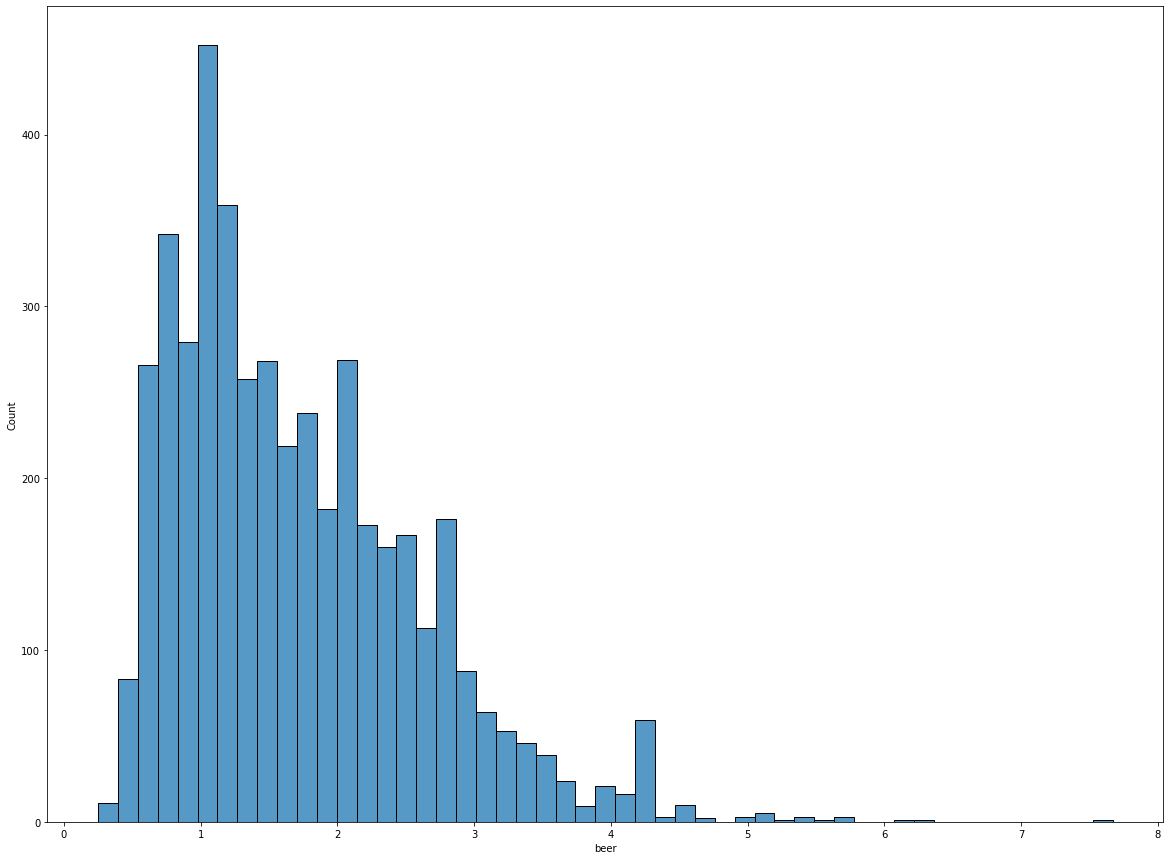

In [ ]:
sns.histplot(numericas_trans['beer'])

In [ ]:
stats.shapiro(numericas_trans['wine'])

ShapiroResult(statistic=0.930995523929596, pvalue=2.4880054234087127e-41)

<AxesSubplot:xlabel='wine', ylabel='Count'>

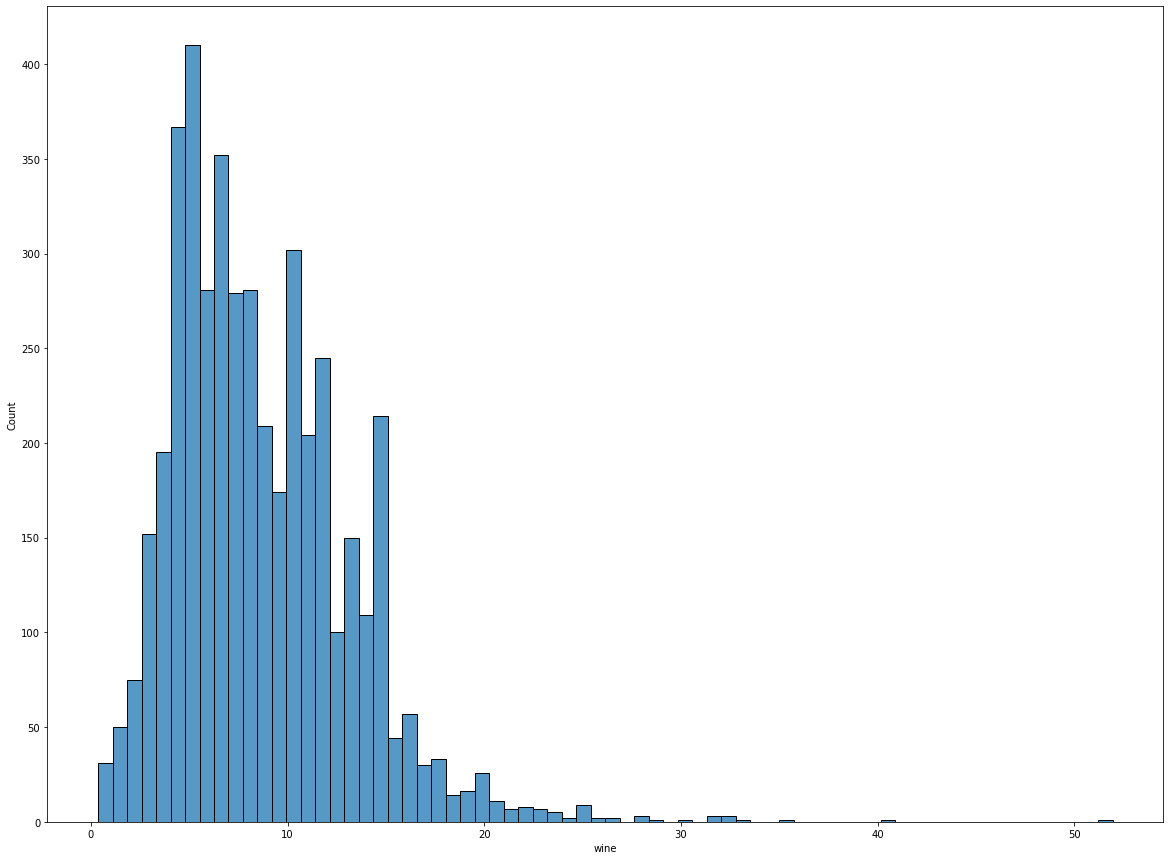

In [ ]:
sns.histplot(numericas_trans['wine'])

In [32]:
categoricas = df.select_dtypes(include = 'object')

In [33]:
categoricas = categoricas.reset_index()
categoricas.head(2)

,index,city,country
0,0,Seoul,South Korea
1,1,Shanghai,China


In [34]:
numericas_trans = numericas_trans.reset_index()
numericas_trans.head(2)

,index,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,0,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,1,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87


In [35]:
df_final = categoricas.merge(numericas_trans, how='inner', left_on='index', right_on='index')

In [36]:
df_final.stb.missing().T

,index,city,apt_3beds_outcentre,primary_school,preschool,cinema,gym_monthly,internet,basic,gasoline,taxi,public_transport_ticket,cigarettes_marlboro,beer,wine,water,banana,beef,chicken,eggs,rice,milk,cappuccino,mcdonalds,country,monthly_salary
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0,4081.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_final.shape

(4081, 26)

In [38]:
df_final.drop('index', inplace=True, axis=1)

In [39]:
# guardamos los datos sin nulos, con las columnas filtradas los nombres cambiados para facilitar el análisis
df_final.to_csv('../archivos/coste_vida_valido.csv')

In [40]:
df_final

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,Seoul,South Korea,6.15,3.93,2.20,3.530000,4.04,10.580000,41.610000,3.710000,1.05,15.360000,2.120000,3.460000,1.000000,0.920000,1.430000,182.13,22.48,55.880000,9.60,404.150000,17902.550000,1731.080000,2689.620000
1,Shanghai,China,5.69,3.98,2.74,1.220000,2.22,4.860000,13.120000,1.600000,0.64,14.240000,0.940000,3.560000,0.570000,0.430000,1.200000,66.00,17.07,63.490000,8.54,1382.620000,26379.450000,1561.590000,1419.870000
2,Guangzhou,China,4.98,3.54,1.91,1.030000,1.71,3.770000,11.750000,1.440000,0.51,11.390000,0.950000,3.700000,0.360000,0.370000,1.190000,59.65,16.66,34.170000,8.54,555.180000,24556.210000,688.050000,1211.680000
3,Mumbai,India,3.68,2.48,0.75,0.830000,0.95,3.690000,5.950000,0.670000,0.35,9.830000,2.270000,4.300000,0.250000,0.310000,1.350000,43.57,9.33,25.370000,4.30,107.070000,3682.670000,699.800000,640.810000
4,Delhi,India,4.30,1.77,0.73,0.850000,1.02,3.810000,5.710000,0.750000,0.36,9.830000,1.540000,4.300000,0.490000,0.220000,1.240000,58.07,7.95,21.200000,4.91,74.000000,1964.240000,329.150000,586.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Whitehorse,Canada,10.19,3.57,1.30,1.680000,3.35,7.650000,28.320000,2.450000,4.76,11.550000,4.110000,30.580000,4.441553,1.540000,1.360000,129.12,52.33,32.508739,13.59,1359.160000,3295.960000,2348.401068,5946.320000
4077,Wolfsberg,Austria,8.15,3.40,1.04,1.560000,3.17,7.250000,11.330000,4.300000,1.63,8.150000,3.510000,25.820000,2.290000,0.830000,1.430000,106.86,42.47,46.210000,11.55,1198.279907,27183.180000,906.110000,3481.060000
4078,Yucca Valley,United States,8.50,3.90,1.06,1.980000,4.45,13.470000,19.840000,2.690000,2.13,15.240000,4.250000,9.920000,3.190000,1.060000,1.630000,129.93,56.70,56.700000,5.32,177.180000,2126.150000,1417.430000,2480.510000
4079,Branson,United States,12.89,1.80,1.80,1.379397,1.24,6.175241,12.958568,1.591765,0.77,8.812994,1.534370,5.373776,1.052280,1.030000,1.010000,77.35,27.46,25.780000,7.74,266.900373,3349.336130,412.550000,784.703925


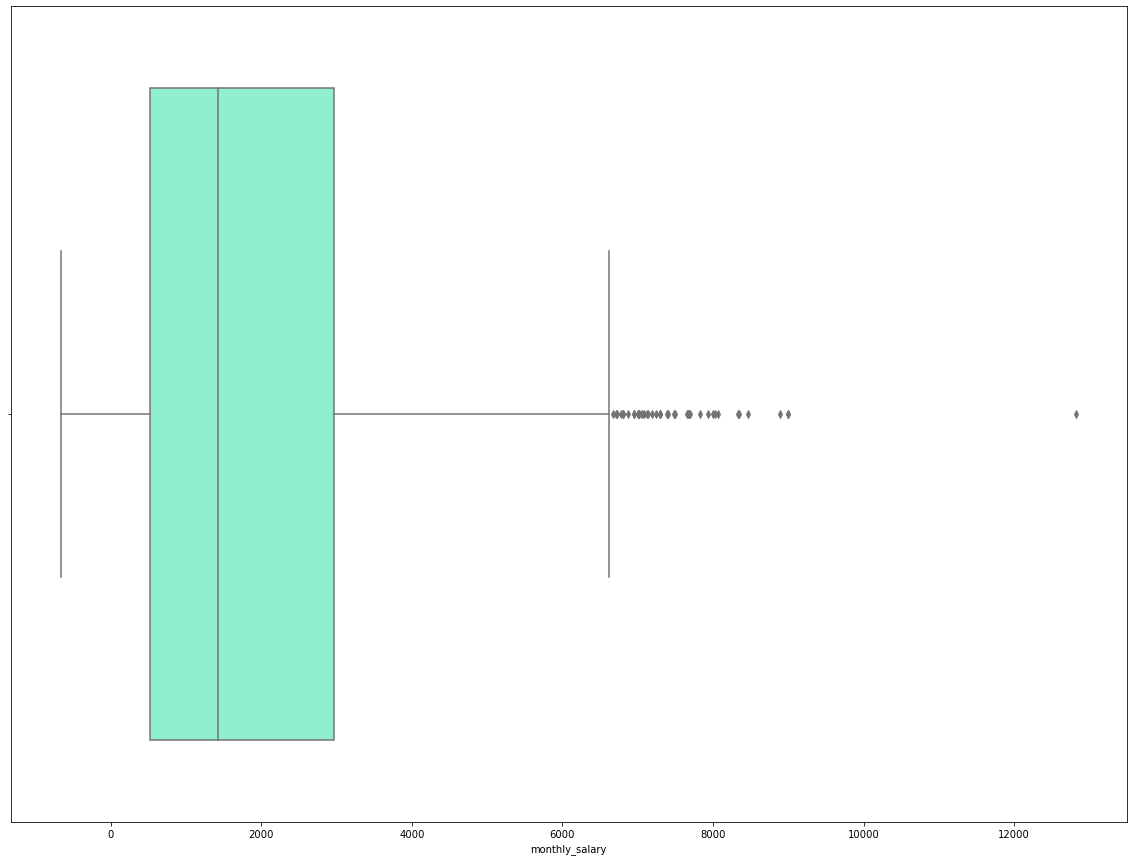

In [49]:
sns.boxplot(x = 'monthly_salary', data = df_final, color = "aquamarine");

In [41]:
num_final = df_final.select_dtypes(include=np.number)
for col in num_final.columns:
    if stats.shapiro(num_final[col])[1] > 0.05:
        print(f'{col} SÍ tiene distribución normal -> {stats.shapiro(num_final[col])[1]}')
    else:
        print(f'{col}, NO tiene distribución normal -> {stats.shapiro(num_final[col])[1]}')
    print('--------------------------------------------------------')

mcdonalds, NO tiene distribución normal -> 3.4838724543004026e-29
--------------------------------------------------------
cappuccino, NO tiene distribución normal -> 8.958853588520797e-30
--------------------------------------------------------
milk, NO tiene distribución normal -> 0.0
--------------------------------------------------------
rice, NO tiene distribución normal -> 0.0
--------------------------------------------------------
eggs, NO tiene distribución normal -> 6.608482079321293e-38
--------------------------------------------------------
chicken, NO tiene distribución normal -> 0.0
--------------------------------------------------------
beef, NO tiene distribución normal -> 0.0
--------------------------------------------------------
banana, NO tiene distribución normal -> 0.0
--------------------------------------------------------
water, NO tiene distribución normal -> 0.0
--------------------------------------------------------
wine, NO tiene distribución normal ->

In [42]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
    
    return dicc_indices 

In [43]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, numericas)

In [44]:
ind.keys()

dict_keys(['mcdonalds', 'cappuccino', 'milk', 'rice', 'eggs', 'chicken', 'beef', 'banana', 'water', 'wine', 'beer', 'cigarettes_marlboro', 'public_transport_ticket', 'taxi', 'gasoline', 'basic', 'internet', 'gym_monthly', 'cinema', 'preschool', 'primary_school', 'apt_3beds_outcentre', 'monthly_salary'])

In [45]:
df_index = df_final.reset_index()

In [46]:
df_index[df_index['index'].isin(ind['monthly_salary'])]

,index,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
142,142,Zaozhuang,China,8.750000,4.690000,0.920000,3.41000,3.120000,13.220000,16.730000,1.720000,1.880000,11.00000,1.860000,8.000000,2.000000,1.240000,1.280000,280.06,72.000000,40.330000,12.250000,450.000000,13500.000000,1666.670000,3926.670000
272,272,Kampala,Uganda,4.610000,1.640000,0.730000,0.74000,0.850000,3.150000,6.140000,0.630000,0.350000,7.37000,1.930000,3.070000,0.370000,0.170000,1.130000,56.80,9.550000,17.640000,3.070000,32.750000,2444.070000,216.470000,320.860000
560,560,Zamboanga City,Philippines,3.380000,3.930000,1.840000,1.92000,2.670000,10.580000,15.360000,3.070000,0.900000,15.36000,1.920000,3.460000,0.960000,0.920000,1.380000,135.98,18.440000,46.090000,7.680000,404.150000,17902.550000,460.940000,1762.400000
980,980,Asyut,Egypt,2.690000,1.790000,1.810000,1.19000,1.620000,3.050000,4.840000,1.490000,0.610000,4.49000,1.100000,2.690000,0.190000,0.260000,1.320000,92.24,37.680000,33.190000,5.200000,285.580000,6100.300000,318.470000,284.080000
1321,1321,Heroica Nogales,Mexico,8.890000,3.290000,1.840000,3.05000,3.190000,10.900000,10.930000,1.440000,1.980000,11.12000,2.980000,12.970000,2.220000,1.450000,1.350000,210.42,54.660000,38.310000,11.860000,567.600000,7893.240000,1257.310000,3239.880000
1425,1425,Magdeburg,Germany,7.000000,4.000000,0.940000,2.20000,2.330000,9.270000,15.390000,1.080000,1.660000,10.00000,1.430000,7.500000,1.550887,1.283413,1.020000,77.50,55.000000,7.000000,10.000000,660.906885,9123.384779,1200.000000,1400.000000
1487,1487,Gulfport,United States,3.050000,0.610000,0.580000,0.52000,0.940000,2.540000,5.090000,0.450000,0.340000,7.12000,1.020000,1.910000,0.140000,0.410000,0.200000,21.37,10.150000,16.280000,4.070000,30.520000,1546.520000,122.090000,142.440000
1890,1890,Talcahuano,Chile,4.200000,0.270000,0.760000,0.41000,1.150000,1.900000,4.070000,0.600000,0.270000,6.78000,1.080000,4.340000,0.410000,0.180000,0.530000,27.12,16.270000,6.780000,2.440000,14.920000,903.960000,67.800000,103.050000
2009,2009,Santa Tecla,El Salvador,4.000000,0.960000,0.830000,0.99000,1.120000,3.560000,6.710000,1.720000,0.460000,4.79000,1.110000,2.870000,0.686160,0.730738,1.140000,34.49,22.990000,22.990000,5.750000,95.800000,1839.290000,268.230000,478.980000
2017,2017,Harlingen,United States,2.480000,0.440000,0.400000,0.78000,1.000000,2.270000,7.740000,1.550000,0.240000,4.18000,0.980000,2.630000,0.150000,0.370000,0.670000,30.98,20.860000,14.460000,3.100000,23.750000,1394.050000,135.270000,229.240000
